Average p-value (balanced): 0.26177
Average p-value (imbalanced): 0.54667


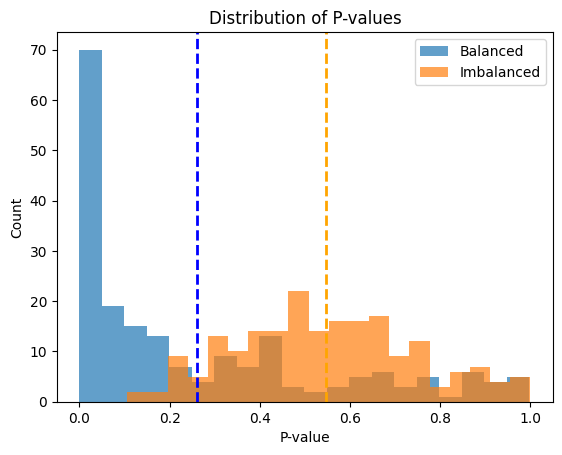

In [4]:
import numpy as np

def permutation_test(data_a, data_b, n_permutations=10000, random_state=None):
    """
    Performs a two-sided permutation test comparing means of data_a and data_b.
    Returns the p-value.
    """
    if random_state is not None:
        np.random.seed(random_state)
        
    observed_diff = np.mean(data_a) - np.mean(data_b)
    combined = np.concatenate([data_a, data_b])
    n_a = len(data_a)
    count_extreme = 0
    
    for _ in range(n_permutations):
        np.random.shuffle(combined)
        perm_diff = np.mean(combined[:n_a]) - np.mean(combined[n_a:])
        if abs(perm_diff) >= abs(observed_diff):
            count_extreme += 1
            
    p_value = count_extreme / n_permutations
    return p_value

# Parameters for the simulation
n_sim = 200         # Number of simulation repeats
n_permutations = 500
balanced_size = 50  # Number of trials per condition in the balanced scenario
imb_a_size = 10     # Condition A size (smaller)
imb_b_size = 90     # Condition B size (larger)
mean_A = 10
mean_B = 0
std_A = 1
std_B = 50

balanced_pvals = []
imbalanced_pvals = []

for i in range(n_sim):
    # Generate balanced data
    data_a_bal = np.random.normal(mean_A, std_A, balanced_size)
    data_b_bal = np.random.normal(mean_B, std_B, balanced_size)
    
    # Generate imbalanced data
    data_a_imb = np.random.normal(mean_A, std_A, imb_a_size)
    data_b_imb = np.random.normal(mean_B, std_B, imb_b_size)
    
    # Run permutation tests
    p_bal = permutation_test(data_a_bal, data_b_bal, n_permutations=n_permutations)
    p_imb = permutation_test(data_a_imb, data_b_imb, n_permutations=n_permutations)
    
    balanced_pvals.append(p_bal)
    imbalanced_pvals.append(p_imb)

# Summarize results
balanced_mean_p = np.mean(balanced_pvals)
imbalanced_mean_p = np.mean(imbalanced_pvals)

print("Average p-value (balanced):", balanced_mean_p)
print("Average p-value (imbalanced):", imbalanced_mean_p)

# Compare distributions:
# You might also wish to visualize the distributions of p-values.
import matplotlib.pyplot as plt

plt.hist(balanced_pvals, bins=20, alpha=0.7, label='Balanced')
plt.hist(imbalanced_pvals, bins=20, alpha=0.7, label='Imbalanced')
plt.axvline(balanced_mean_p, color='blue', linestyle='dashed', linewidth=2)
plt.axvline(imbalanced_mean_p, color='orange', linestyle='dashed', linewidth=2)
plt.xlabel('P-value')
plt.ylabel('Count')
plt.title('Distribution of P-values')
plt.legend()
plt.show()

Sample Size (N) | Mean Estimated Var | Std Dev of Estimated Var
             5 |             1.0055 |                  0.7164
            10 |             0.9963 |                  0.4661
            50 |             0.9972 |                  0.2029
           100 |             1.0004 |                  0.1423
           500 |             0.9996 |                  0.0631
          1000 |             0.9998 |                  0.0447


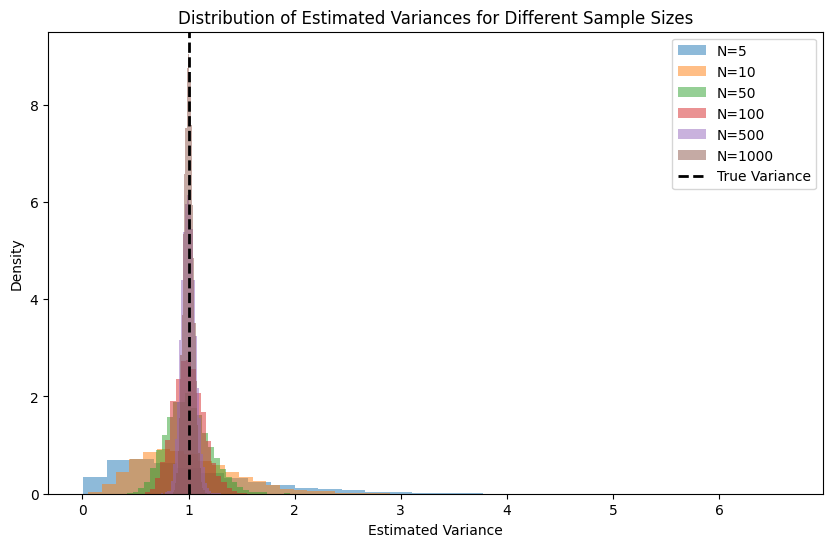

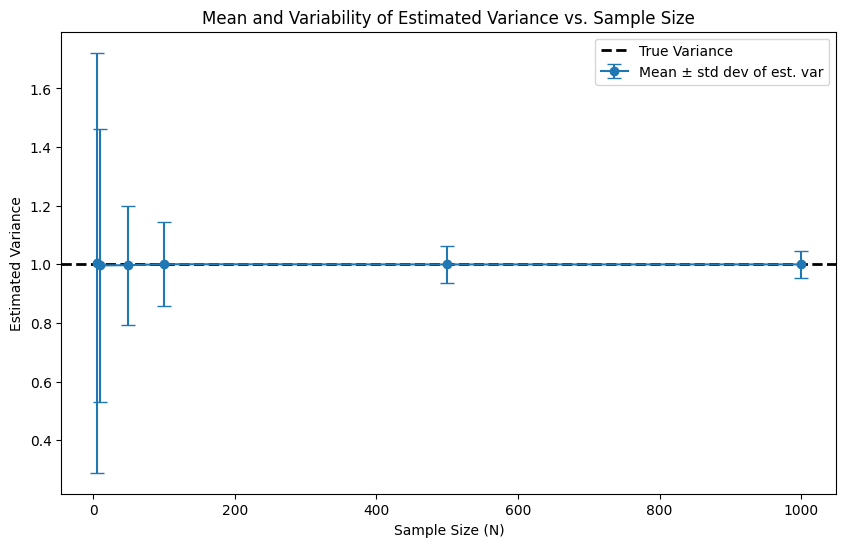

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Set parameters for the underlying distribution
true_mean = 0.0
true_std = 1.0
true_var = true_std**2

# Simulation parameters
n_trials = 10000  # How many times we sample for a given N
sample_sizes = [5, 10, 50, 100, 500, 1000]  # Different sample sizes to investigate

# We'll store the variances estimated for each sample size
estimated_vars = {}

for N in sample_sizes:
    var_estimates = []
    for _ in range(n_trials):
        data = np.random.normal(true_mean, true_std, N)
        # Compute the unbiased estimator of variance
        var_est = np.var(data, ddof=1)
        var_estimates.append(var_est)
    estimated_vars[N] = np.array(var_estimates)

# Compute means and std of the estimated variances for each N
means = [np.mean(estimated_vars[N]) for N in sample_sizes]
stds = [np.std(estimated_vars[N]) for N in sample_sizes]

# Print out summary
print("Sample Size (N) | Mean Estimated Var | Std Dev of Estimated Var")
for i, N in enumerate(sample_sizes):
    print(f"{N:14d} | {means[i]:18.4f} | {stds[i]:23.4f}")

# Plot the distributions of variance estimates
plt.figure(figsize=(10,6))
for N in sample_sizes:
    plt.hist(estimated_vars[N], bins=30, alpha=0.5, label=f'N={N}', density=True)
plt.axvline(true_var, color='k', linestyle='dashed', linewidth=2, label='True Variance')
plt.xlabel('Estimated Variance')
plt.ylabel('Density')
plt.title('Distribution of Estimated Variances for Different Sample Sizes')
plt.legend()
plt.show()

# Plot how the standard deviation of the variance estimate changes with N
plt.figure(figsize=(10,6))
plt.errorbar(sample_sizes, means, yerr=stds, fmt='o-', capsize=5, label='Mean ± std dev of est. var')
plt.axhline(true_var, color='k', linestyle='dashed', linewidth=2, label='True Variance')
plt.xlabel('Sample Size (N)')
plt.ylabel('Estimated Variance')
plt.title('Mean and Variability of Estimated Variance vs. Sample Size')
plt.legend()
plt.show()

Variance from the full 1000-sample dataset: 0.9589
Mean variance from repeated 10-sample subsets: 0.9535
Std. dev. of variance estimates from 10-sample subsets: 0.4508


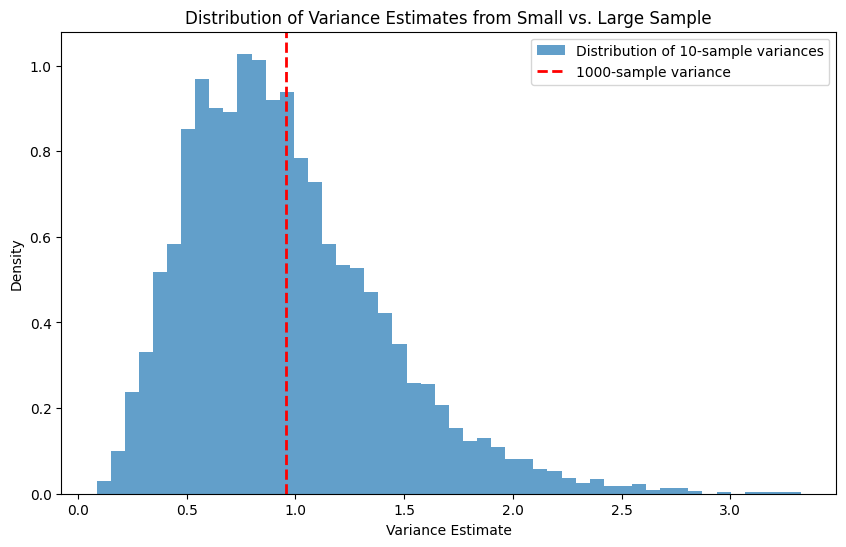

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# Generate 1000 random numbers from a normal distribution
N_large = 1000
data = np.random.normal(loc=0.0, scale=1.0, size=N_large)

# Compute the variance from the large 1000-sample dataset (unbiased estimate)
var_large = np.var(data, ddof=1)

# Now, repeatedly sample small subsets of size n_small from the data
n_small = 10
n_samples = 5000  # how many times we sample subsets of size 10
var_small_samples = []

for _ in range(n_samples):
    # Sample with replacement from the 1000-sample data
    subset = np.random.choice(data, size=n_small, replace=True)
    var_small = np.var(subset, ddof=1)
    var_small_samples.append(var_small)

var_small_samples = np.array(var_small_samples)

# Summaries
mean_small = np.mean(var_small_samples)
std_small = np.std(var_small_samples)

print("Variance from the full 1000-sample dataset: {:.4f}".format(var_large))
print("Mean variance from repeated 10-sample subsets: {:.4f}".format(mean_small))
print("Std. dev. of variance estimates from 10-sample subsets: {:.4f}".format(std_small))

# Plot histogram of the small-sample variance estimates and mark the large-sample variance
plt.figure(figsize=(10,6))
plt.hist(var_small_samples, bins=50, alpha=0.7, density=True, label='Distribution of 10-sample variances')
plt.axvline(var_large, color='red', linestyle='dashed', linewidth=2, label='1000-sample variance')
plt.xlabel('Variance Estimate')
plt.ylabel('Density')
plt.title('Distribution of Variance Estimates from Small vs. Large Sample')
plt.legend()
plt.show()

In [13]:
from ieeg.calc.fast import mean_diff
import ieeg.viz
import scipy.stats as st
import numpy as np
import matplotlib.pyplot as plt

# seed = 0
# np.random.seed(seed)
n = 1000
m = 1000
# arr1 = st.norm(loc=0, scale=1).rvs(n)
arr1 = np.random.normal(0, 1, (n, m))
# arr2 = st.norm(loc=0.2, scale=1).rvs(n)
arr2 = np.random.normal(0.1, 1, (n, m))
kwargs = {'n_resamples': 1000, 'statistic': mean_diff,
          'alternative': 'greater', 'vectorized': True, 'axis': 0}
# fig1 = plt.figure()
# plt.scatter(arr1, np.arange(n))
# plt.scatter(arr2, np.arange(n))
fig2 = plt.figure()
plt.hist(arr1.flat, bins=20)
plt.hist(arr2.flat, bins=20)
# t, p = stats.time_perm_cluster(arr2, arr1, p_thresh=0.05, n_perm=100000)
res1 = st.permutation_test([arr2[:500], arr1[:500]], **kwargs).pvalue
np.random.shuffle(arr1)
np.random.shuffle(arr2)
res2 = st.permutation_test([arr2[:10], arr1[:990]], **kwargs).pvalue
fig3 = plt.figure()
plt.hist(res1, bins=20)
plt.hist(res2, bins=20)

(array([103.,  64.,  66.,  57.,  60.,  59.,  51.,  52.,  58.,  47.,  40.,
         60.,  48.,  37.,  50.,  36.,  42.,  24.,  22.,  24.]),
 array([0.000999 , 0.0508991, 0.1007992, 0.1506993, 0.2005994, 0.2504995,
        0.3003996, 0.3502997, 0.4001998, 0.4500999, 0.5      , 0.5499001,
        0.5998002, 0.6497003, 0.6996004, 0.7495005, 0.7994006, 0.8493007,
        0.8992008, 0.9491009, 0.999001 ]),
 <BarContainer object of 20 artists>)